# PCA implementation from Scratch

In [12]:
 # STEPS

 # 1. standardization
 # 2. eighen value decompisition
 # 3. dimensionality reduction

In [23]:
# importting the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv('/content/pca_2d_data - pca_2d_data.csv')

In [15]:
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


In [16]:
# STEP 1 - standardization

x_data = data['f1'].values
y_data = data['f2'].values

mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((len(x_data), 2))


X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

In [17]:
X_st

array([[ 1.54535131,  1.45245914],
       [-0.27203872, -0.18355391],
       [ 1.16782713,  1.29657192],
       [-1.46270299, -1.60570434],
       [ 0.6761373 ,  0.78638828],
       [ 1.34947087,  1.37420876],
       [-1.32351276, -1.24217262],
       [ 1.12913003,  1.13352252],
       [ 0.95000678,  0.7936775 ],
       [-0.57106382, -0.51601814],
       [ 0.06851605, -0.13256012],
       [ 0.19697379,  0.17359728],
       [ 0.40492253,  0.61580503],
       [-0.74142803, -0.78689518],
       [-0.14160441, -0.03396865],
       [-1.01204978, -1.12815545],
       [-1.59801963, -1.44282205],
       [ 1.23234064,  1.16652774],
       [-1.21750246, -1.10850974],
       [-0.38075383, -0.61239797]])

In [18]:
# Step 2: Eigen value decomposition

cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data) - 1)

eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

In [20]:
eigenvectors = eigenvectors.T # thats how we want them horizontal
eigenvalues

array([2.09718701, 0.00807615])

In [21]:
# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[0].dot(X_st.T)
X_prime_reduced = X_prime

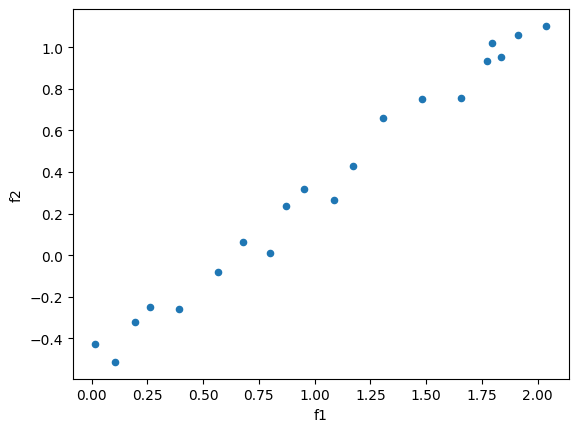

In [24]:
data.plot(x='f1', y ='f2', kind = 'scatter')
plt.show()

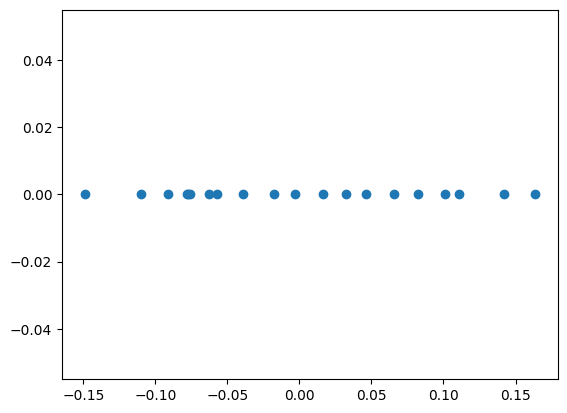

In [25]:
# Step 4: Visualize

plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

# PCA implementation using helper libraries

In [26]:
from sklearn.preprocessing import StandardScaler

data_sc = StandardScaler().fit_transform(data)

In [27]:
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

[0.00807615 2.09718701]


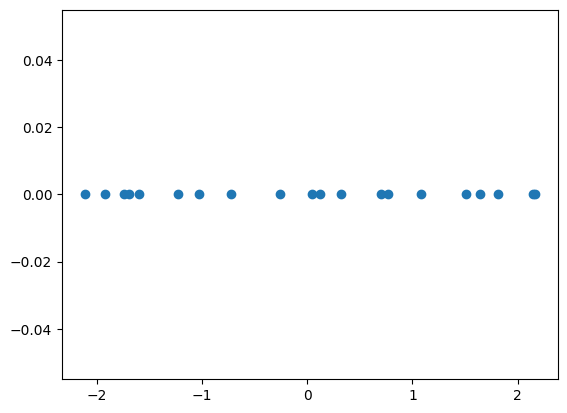

In [29]:
eigenvectors = eigenvectors.T
print(eigenvalues)

X_prime_reduced = eigenvectors[0].dot(data_sc.T)

# Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

PCA Implementation using PCA library directly

In [30]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X_p = pca.fit_transform(data_sc)

In [31]:
print(pca.explained_variance_)

[2.09718701 0.00807615]


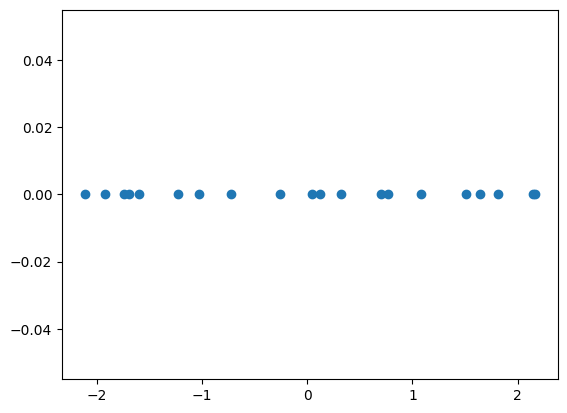

In [32]:
plt.figure()
plt.scatter(X_p[:, 0], np.zeros((len(data_sc),)))
plt.show()

In [33]:
pca.components_ # eigen vectors OR priciple components

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [34]:
pca.explained_variance_

array([2.09718701, 0.00807615])

In [35]:
pca.explained_variance_ratio_

array([0.99616383, 0.00383617])